###  Business Case: Medical Insurance Cost Prediction

Insurance companies need to predict the medical insurance cost (charges) of individuals based on certain personal and lifestyle features like age, BMI, smoking status, and region. Accurate predictions help in fair pricing, better risk assessment, and business profitability.

### Business Objective:  
To develop a predictive model that estimates insurance charges for individuals using historical data. This helps:  

- Improve pricing strategies  
- Detect potentially high-risk individuals (e.g., smokers)  
- Design targeted wellness programs to reduce costs  
- Assist in customer segmentation  

### Key Stakeholders:  
- Insurance Companies – for pricing and risk management  
- Policyholders – for fair premium rates  
- Healthcare Analysts – to identify cost-driving factors  
- Marketing Teams – to tailor wellness campaigns  

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df=pd.read_csv('datasets_13720_18513_insurance(1).csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Domain Analysis: Health Insurance


### Domain:
Healthcare Insurance / Risk Analytics

### Dataset Features:  
## Column Description
- age	  :   Age of the policyholder  
- sex	  :   Gender of the policyholder  
- bmi	  :   Body Mass Index – a measure of body fat  
- children:   Number of children covered under the policy  
- smoker  :   Whether the person smokes (yes/no)  
- region  :   Region of residence in the US (southwest, southeast, northwest, northeast)  
- charges :   Actual medical insurance cost billed (target variable)  

### Basic Checks

In [99]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [102]:
df.count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [103]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [104]:
df.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [105]:
df.value_counts()

age  sex     bmi     children  smoker  region     charges    
19   male    30.590  0         no      northwest  1639.56310     2
47   male    29.830  3         no      northwest  9620.33070     1
48   female  25.850  3         yes     southeast  24180.93350    1
             22.800  0         no      southwest  8269.04400     1
47   male    47.520  1         no      southeast  8083.91980     1
                                                                ..
31   female  25.740  0         no      southeast  3756.62160     1
             23.600  2         no      southwest  4931.64700     1
             21.755  0         no      northwest  4134.08245     1
30   male    44.220  2         no      southeast  4266.16580     1
64   male    40.480  0         no      southeast  13831.11520    1
Name: count, Length: 1337, dtype: int64

In [106]:
for i in df:                       
    if len((df[i].unique())) <= 20:           #for Category columns
        print(df[i].value_counts())
        print('=================')

sex
male      676
female    662
Name: count, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


### EDA

#### Univariate Analysis

In [109]:
df1 = df[['sex', 'children', 'smoker', 'region']]

In [110]:
df1

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


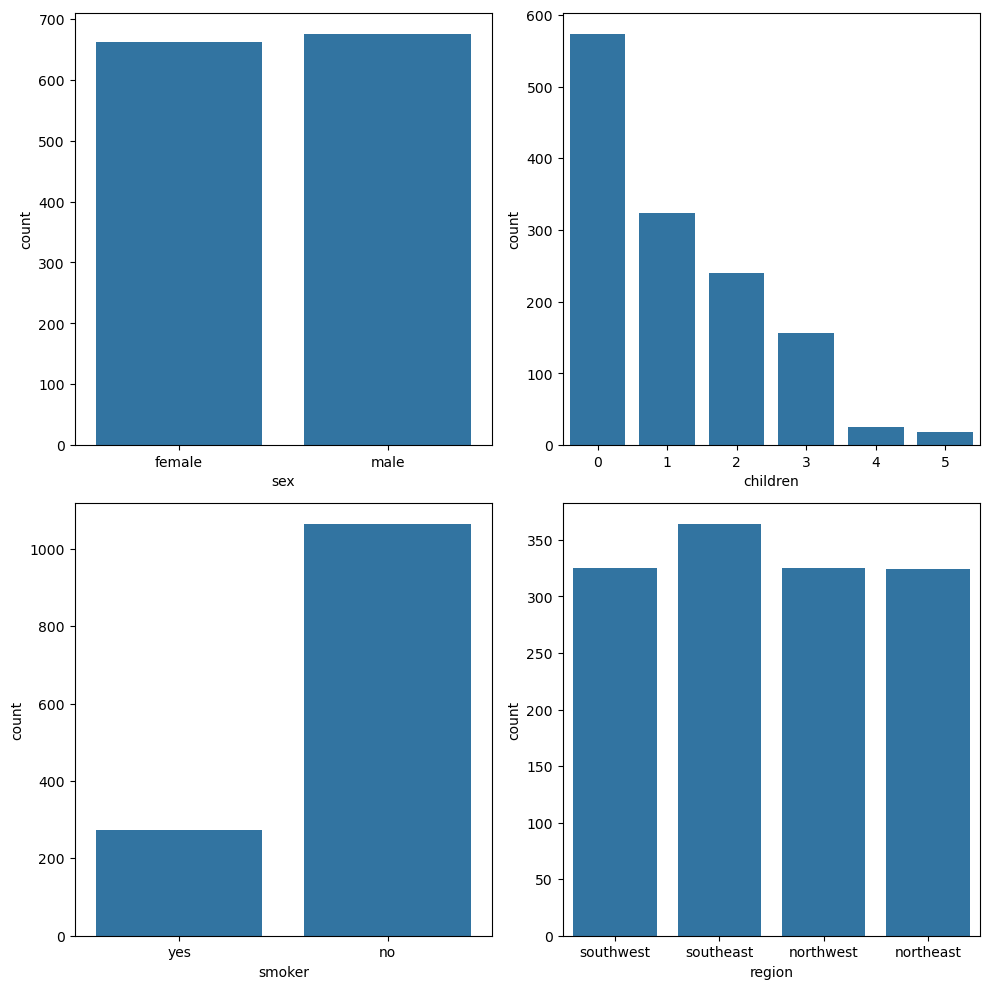

In [111]:
plt.figure(figsize=(10,10))
pltnum = 1
for i in df1:
    plt.subplot(2,2,pltnum)
    sns.countplot(x=df1[i])
    pltnum +=1
plt.tight_layout()

### Insights:

#### 1. Sex  
- Distribution of males and females is almost equal in the dataset.  
- This indicates no gender bias, making the model fairer and more balanced across this feature.  

#### 2. Children  
- Majority of policyholders have 0 to 2 children.  
- Very few have 4 or 5 children, so these are outliers or less common cases.  
- This suggests that most insured individuals are likely young families or individuals without children.  

#### 3. Smoker  
- Significant imbalance:  
   - Non-smokers: Majority   
   - Smokers: Much fewer  
- Important to handle this in modeling (e.g., class imbalance if used in classification) and to highlight in feature importance.  
- Also, smokers are likely to have higher charges, so this will be a key predictor.  

#### 4. Region  
- Fairly balanced distribution across all regions: southwest, southeast, northwest, northeast.  
- No region dominates, indicating geographical diversity is well represented.  


#### Business Interpretation:  
- Smoker status will likely have a strong influence on insurance cost predictions.  
- The equal gender distribution ensures the model won’t be biased based on sex.  
- Regions do not show much variation in count, but could still impact cost depending on regional medical pricing.  
- Since most people have 0–2 children, any insights or patterns around larger families may not generalize well due to limited data.  

In [115]:
df2 = df[['age', 'bmi', 'charges']]

In [116]:
df2

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


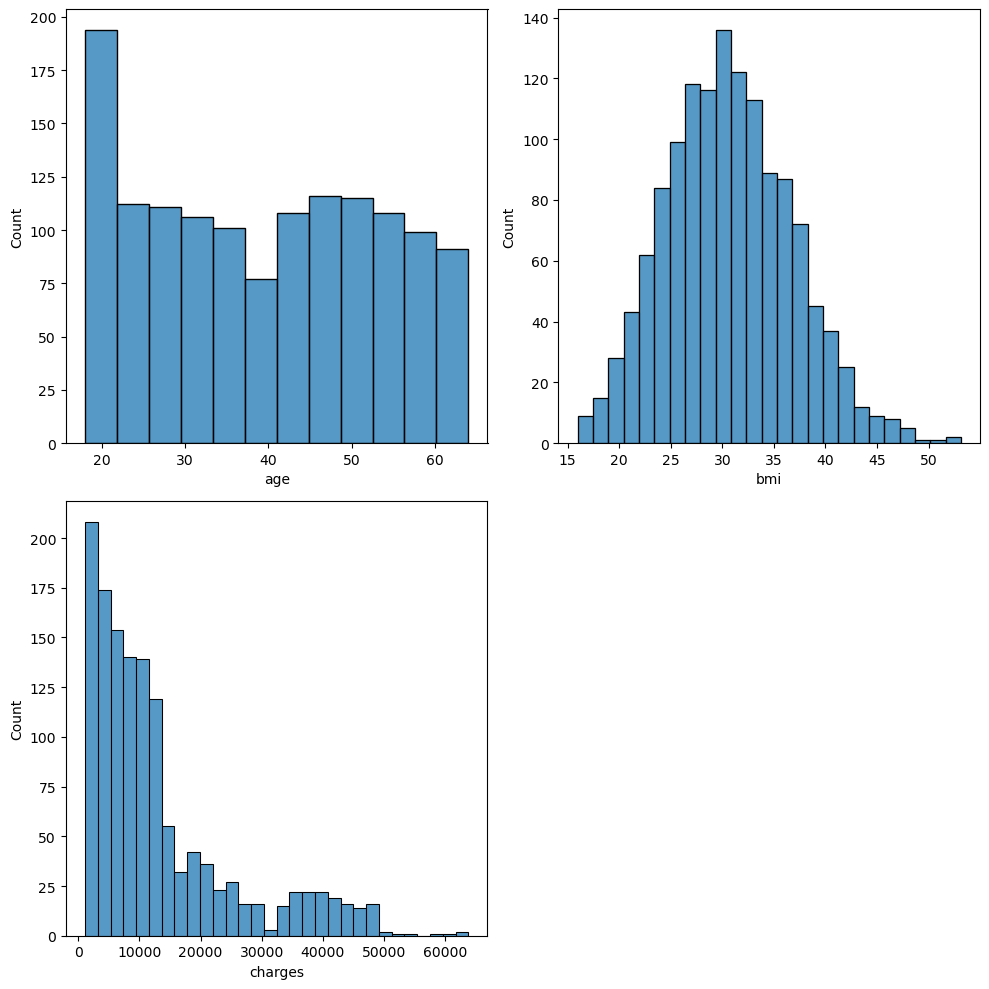

In [117]:
plt.figure(figsize=(10,10))
pltnum = 1
for i in df2:
    plt.subplot(2,2,pltnum)
    sns.histplot(x=df2[i])
    pltnum +=1
plt.tight_layout()

### Insights:

#### 1. Age  
- Fairly uniform distribution across age groups.  
- A spike at age 18–20, likely indicating young adults entering insurance coverage.  
- This balance is helpful in building models that generalize well across age groups.  

#### 2. BMI  
- BMI is roughly bell-shaped (normal distribution) centered around 30, which is on the borderline of obesity.  
- A few outliers above 50 – these might need attention during preprocessing or modeling.  
- Indicates that many policyholders might be overweight or obese, impacting medical costs.  

#### 3. Charges 
- Highly right-skewed (positively skewed).  
- Most individuals have charges below $15,000, but a few go as high as $60,000.  
- This suggests the presence of high-cost outliers, possibly due to smokers, older individuals, or chronic health conditions.  
- Might need log transformation for better model performance, especially in linear models.  

#### Business Implications:  
- High-cost individuals (right side of charges) are likely high-risk, and understanding what drives their costs can help in premium pricing.  
- Since BMI and age have varied distributions, they will likely have different levels of influence on charges.  

#### Bivariate Analysis

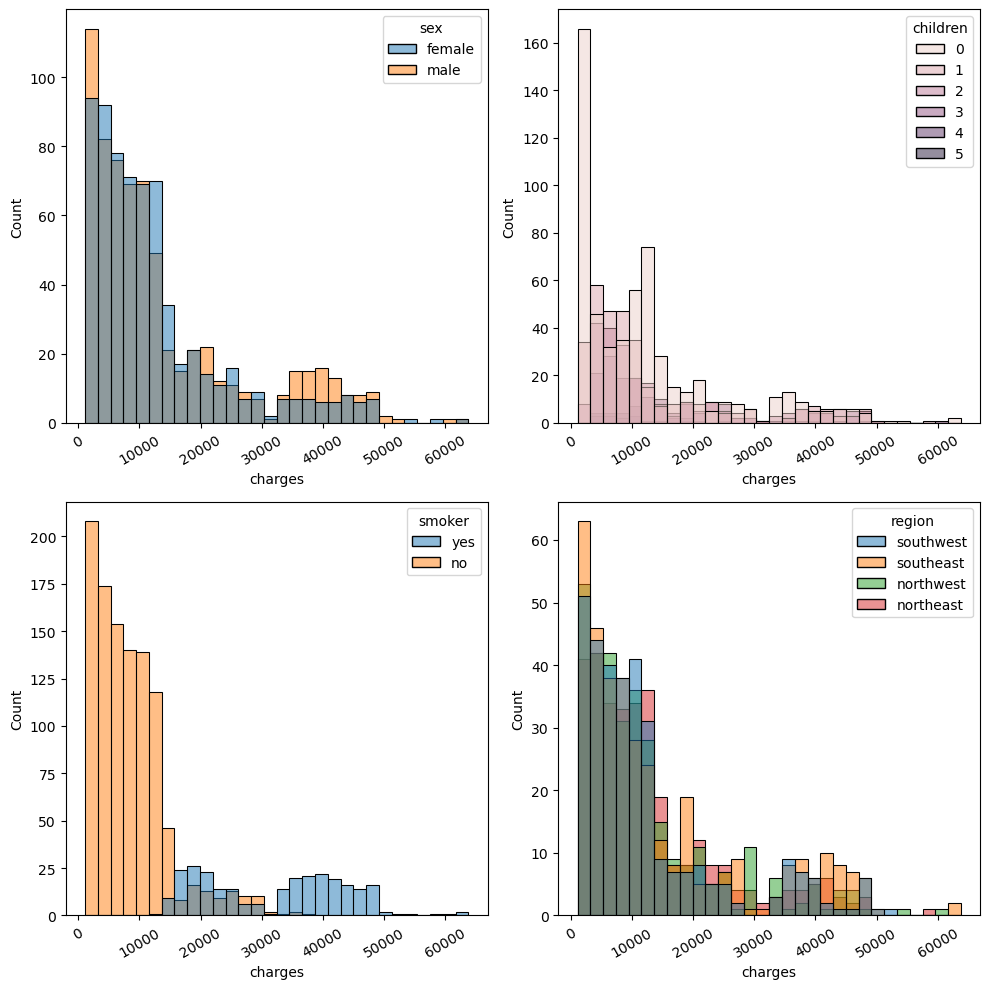

In [122]:
plt.figure(figsize=(10,10))
pltnum = 1
for i in df1:
    plt.subplot(2,2,pltnum)
    plt.xticks(rotation=30)
    sns.histplot(hue=df1[i], x=df.charges)
    pltnum +=1
plt.tight_layout()

### Insights:

#### 1.Charges vs.Sex  
- Distribution of charges for male and female is quite similar.  
- No drastic difference in median or spread of charges.  
- Insight: Gender does not significantly impact medical insurance charges.  

#### 2.Charges vs. Number of Children  
- People with 0–2 children are more frequent in the dataset.  
- Charges are similarly spread across all groups, regardless of the number of children.  
- Insight: Number of children does not have a strong influence on charges.  

#### 3.Charges vs. Smoker  
- This plot shows a clear distinction:  
   - Smokers (orange) have much higher charges than non-smokers.   
   - Non-smokers are concentrated in the lower charge region.  
- Insight: Smoking is a very strong predictor of higher insurance charges — clear class separation.  

#### 4.Charges vs. Region  
- Distribution is fairly similar for all regions (northeast, northwest, southeast, southwest).  
- No specific region stands out with distinctly higher or lower charges.  
- Insight: Region does not significantly affect medical costs in this dataset.  

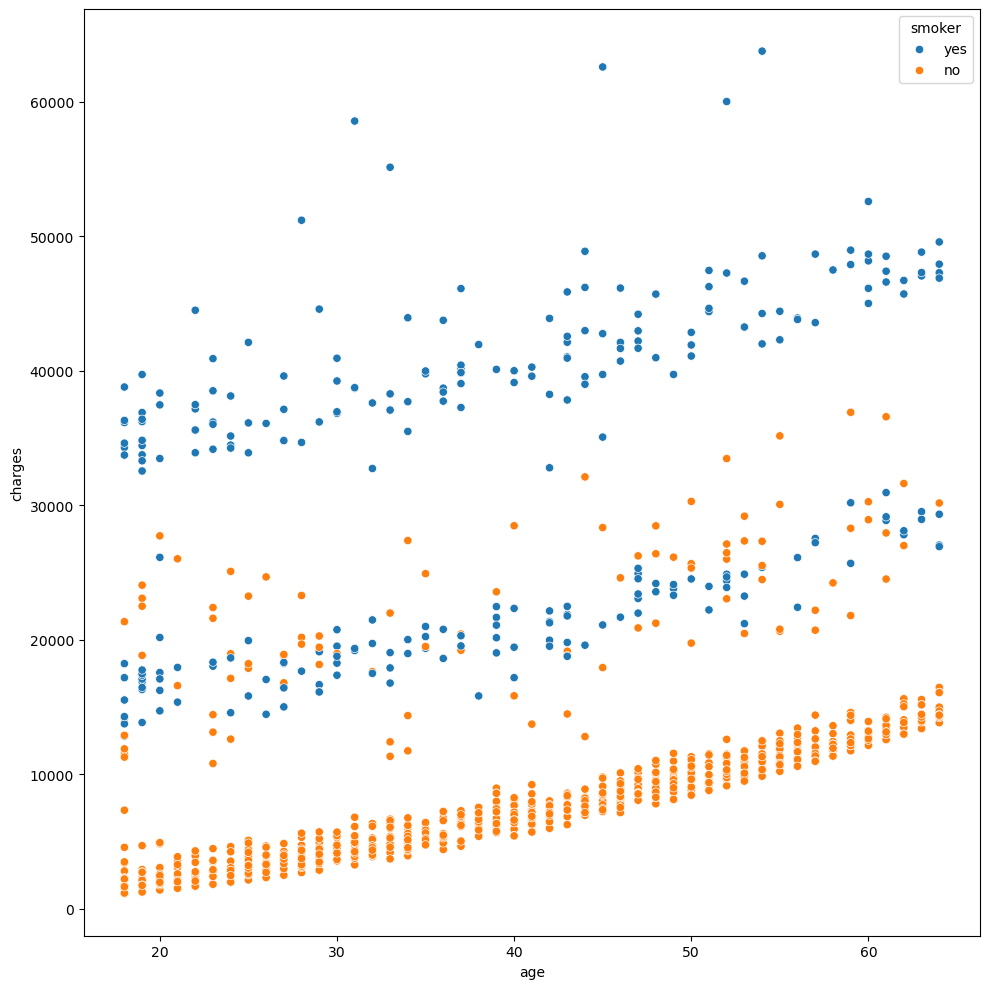

In [125]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df2.age, y=df.charges, hue=df.smoker)
plt.tight_layout()

### Insights:

- Smokers incur much higher medical charges than non-smokers, across all age groups.  
- Charges increase with age for both smokers and non-smokers, but the increase is steeper for smokers.  
- Non-smokers show a more gradual and consistent rise in charges with age.  
- Smokers display a wider spread in charges, indicating higher variability and unpredictability in medical costs.  

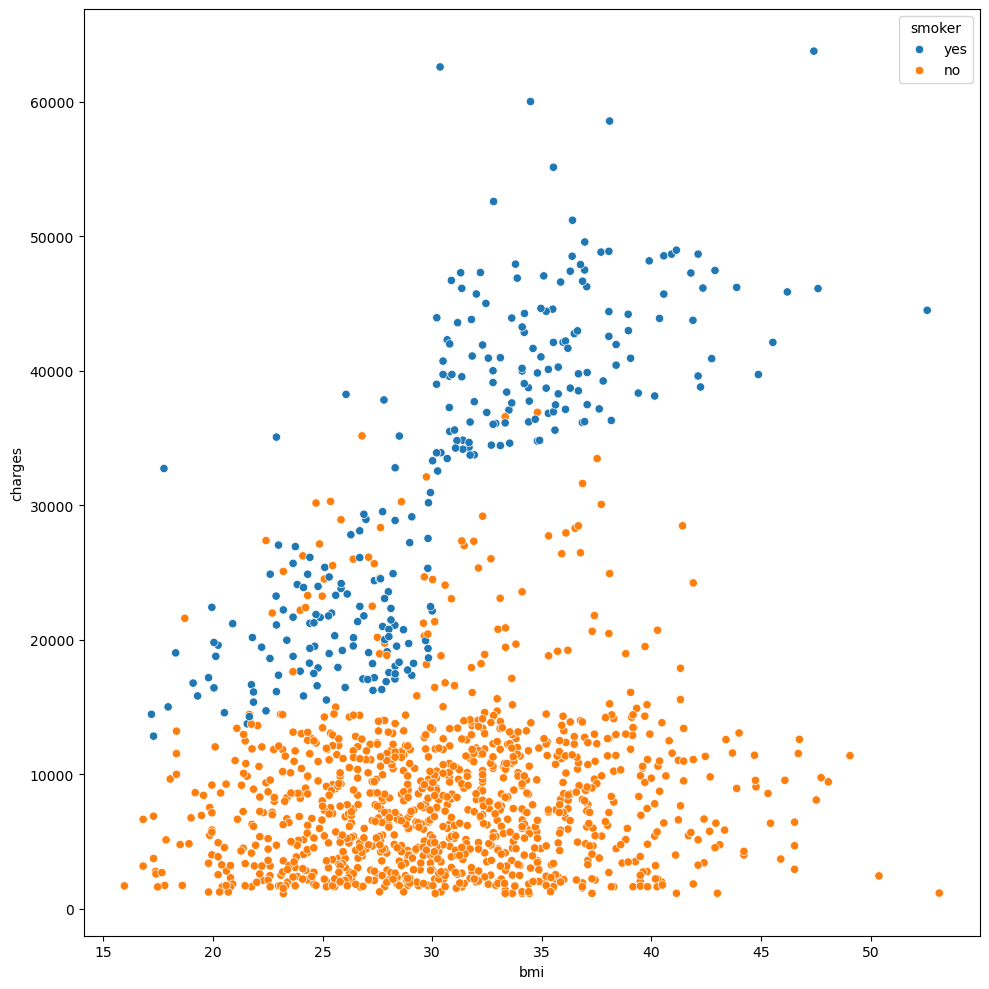

In [128]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df2.bmi, y=df.charges,hue = df.smoker)
plt.tight_layout()

### Insights:

- Smokers (blue) are charged significantly higher medical costs across all BMI values.  
- Among smokers, charges increase steeply with rising BMI, especially beyond BMI > 30 (obese category).  
- For non-smokers (orange), charges are mostly below 20,000, and there’s less variation with BMI.  
- High charges are more common among obese smokers, indicating a compounding risk of obesity and smoking on medical costs.  

### Data Preprocessing

In [132]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

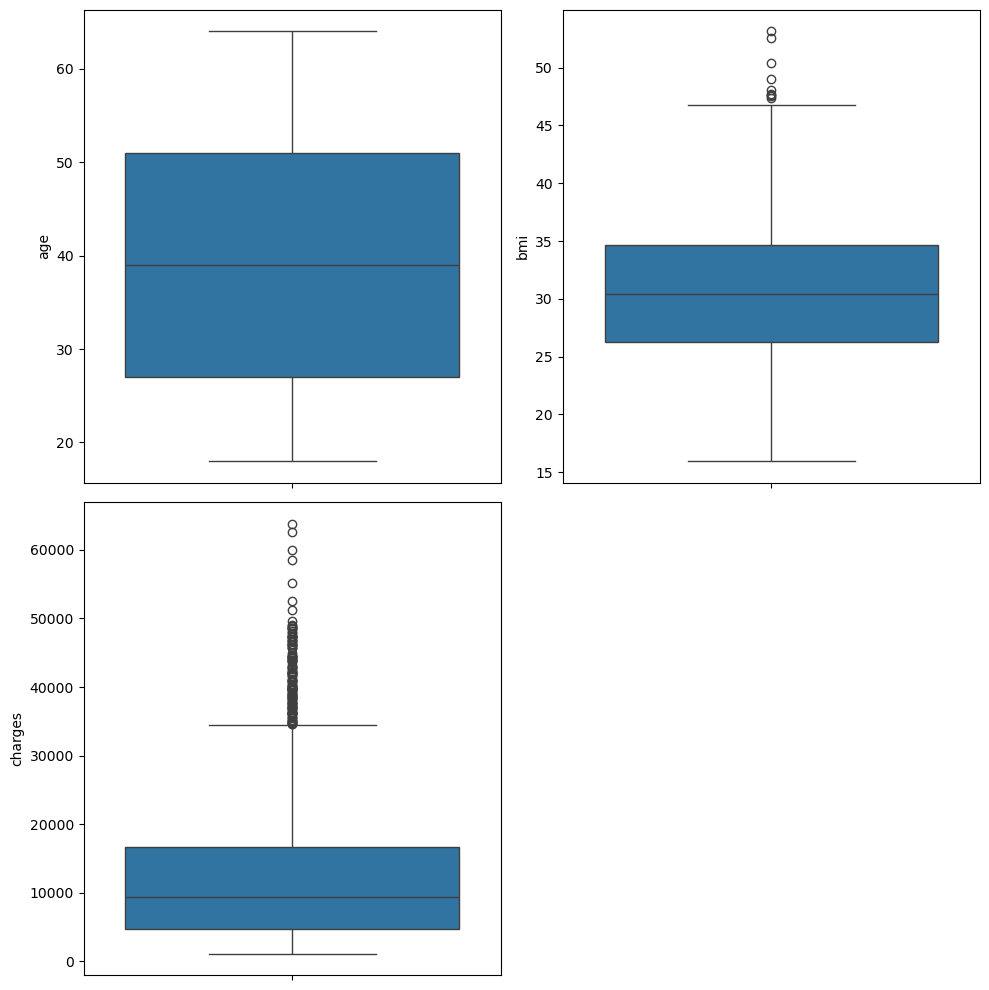

In [133]:
plt.figure(figsize=(10 ,10))
pltnum = 1
for i in df2:
    plt.subplot(2,2,pltnum)
    plt.xticks(rotation=30)
    sns.boxplot(df[i])
    pltnum +=1
plt.tight_layout()

### Handling with Categorical Values

##### Label Encoding

In [136]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [137]:
df.sex = lb.fit_transform(df.sex)

In [138]:
df.smoker = lb.fit_transform(df.smoker)

In [139]:
df.region = lb.fit_transform(df.region)

In [140]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


### Scaling

In [143]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [144]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [145]:
df.age = ms.fit_transform(df[['age']])

In [146]:
df.bmi = ms.fit_transform(df[['bmi']])

In [147]:
df.charges = ms.fit_transform(df[['charges']])

In [148]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0,1,3,0.251611
1,0.000000,1,0.479150,1,0,2,0.009636
2,0.217391,1,0.458434,3,0,2,0.053115
3,0.326087,1,0.181464,0,0,1,0.333010
4,0.304348,1,0.347592,0,0,1,0.043816


### Feature Selection

In [150]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<Axes: >

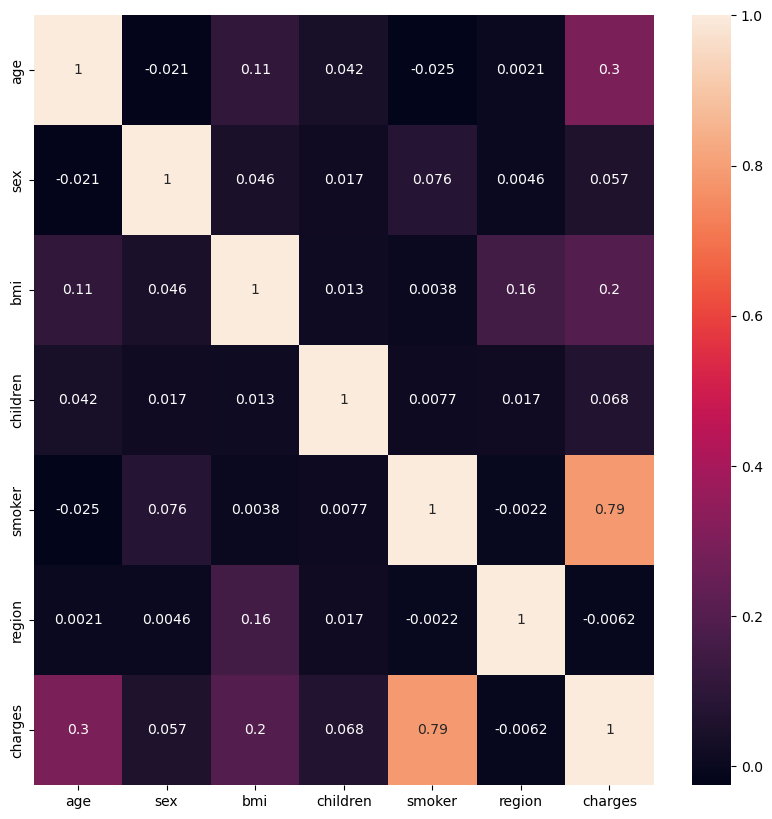

In [151]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Model Creation

In [153]:
x = df.drop('charges',axis=1)
x

,age,sex,bmi,children,smoker,region
0,0.021739,0,0.321227,0,1,3
1,0.000000,1,0.479150,1,0,2
2,0.217391,1,0.458434,3,0,2
3,0.326087,1,0.181464,0,0,1
4,0.304348,1,0.347592,0,0,1
...,...,...,...,...,...,...
1333,0.695652,1,0.403820,3,0,1
1334,0.000000,0,0.429379,0,0,0
1335,0.000000,0,0.562012,0,0,2
1336,0.065217,0,0.264730,0,0,3


In [154]:
y = df.charges
y

0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42) 

In [156]:
x_train

,age,sex,bmi,children,smoker,region
693,0.130435,1,0.207022,0,0,1
1297,0.217391,0,0.283831,2,0,2
634,0.717391,1,0.638687,1,0,3
1022,0.630435,1,0.541297,1,1,2
178,0.608696,0,0.348130,2,0,3
...,...,...,...,...,...,...
1095,0.000000,0,0.414044,4,0,0
1130,0.456522,0,0.212806,5,0,2
1294,0.869565,1,0.247915,0,0,0
860,0.413043,0,0.851224,2,1,3


In [157]:
x_test

,age,sex,bmi,children,smoker,region
764,0.586957,0,0.247915,2,0,0
887,0.391304,0,0.378262,0,0,1
890,1.000000,0,0.293920,0,1,1
1293,0.608696,1,0.263250,3,0,1
259,0.021739,1,0.429379,0,1,1
...,...,...,...,...,...,...
342,0.913043,0,0.311811,0,0,0
308,0.869565,1,0.508609,0,0,0
1128,0.347826,1,0.453054,1,0,3
503,0.021739,1,0.384450,0,1,2


In [158]:
y_train

693     0.019651
1297    0.051375
634     0.131998
1022    0.655869
178     0.122930
          ...   
1095    0.054899
1130    0.119084
1294    0.172538
860     0.718159
1126    0.145139
Name: charges, Length: 1003, dtype: float64

In [159]:
y_test

764     0.127269
887     0.066247
890     0.450276
1293    0.130570
259     0.520817
          ...   
342     0.193065
308     0.172753
1128    0.211282
503     0.501631
1197    0.073074
Name: charges, Length: 335, dtype: float64

In [160]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [161]:
LR.fit(x_train,y_train)

LinearRegression()

In [162]:
y_pred = LR.predict(x_test)
y_pred

array([ 0.12443491,  0.09474737,  0.57109054,  0.13446894,  0.4122847 ,
        0.15379345, -0.01614794,  0.25408447, -0.00215317,  0.16275771,
        0.42838051,  0.13297124,  0.06544815,  0.59609679,  0.62600377,
        0.5750744 ,  0.22565999,  0.5550536 ,  0.12768001,  0.48398096,
        0.04153453,  0.14253474,  0.01749628,  0.09409246,  0.16307061,
        0.18849731,  0.21208559,  0.07993161,  0.14039777,  0.01672275,
        0.12521583,  0.19156813,  0.05384659,  0.03615327,  0.05120491,
        0.1902667 ,  0.01032749,  0.12041568,  0.51331548,  0.50249965,
        0.04116429,  0.05142256,  0.20608355,  0.16638812,  0.12277483,
        0.17464102,  0.06559689,  0.02926979,  0.54932721,  0.12868228,
        0.23575938,  0.01940419,  0.17949754,  0.0046682 ,  0.19743046,
        0.18325513,  0.05086731,  0.49582304,  0.19302914,  0.18741592,
        0.20677532,  0.14921382,  0.24285478,  0.10619508,  0.17048999,
        0.04640901,  0.40486618,  0.15810802,  0.01556467,  0.07

In [163]:
y_test.array

<NumpyExtensionArray>
[ 0.12726860920046856,  0.06624736929622971,   0.4502755035729905,
  0.13056996711587793,   0.5208167748406475,  0.05450062094018852,
 0.015889671583675116,  0.20892201322026643,  0.04167296814888933,
   0.1459342251370596,
 ...
  0.11023549063676866,   0.2042816339787989,   0.1543544976795634,
   0.2674766723359259,  0.15131295900868796,   0.1930646408656597,
  0.17275291670733817,  0.21128165937810817,   0.5016311556819103,
  0.07307373115047297]
Length: 335, dtype: float64

### Model Evalution

In [165]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [166]:
mse=mean_squared_error(y_test,y_pred) 
mse

0.008961928993055528

In [167]:
import math
rmse = math.sqrt(mse)
rmse

0.09466746533553926

In [168]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.06788435130242731

In [169]:
r2=r2_score(y_test,y_pred) 
r2

0.7668905583460908

In [170]:
adj_r2 = (1-(1-r2)*(50-1)/(50-3-1)) 
adj_r2

0.7516877686730097

### Cross Validation

In [172]:
from sklearn.model_selection import cross_val_score

In [173]:
LR_cv_scores = cross_val_score(LR, x, y, scoring='r2', cv=5)

In [174]:
print("Linear Regression R² Scores:", LR_cv_scores)
print("Average R² Score:", LR_cv_scores.mean())

Linear Regression R² Scores: [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
Average R² Score: 0.7472559473580954


### Hyper Parameter Tunning

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [False, True]
}

In [178]:
grid_search = GridSearchCV(LR, param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [False, True]},
             scoring='r2')

In [179]:
print("Best Params:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

Best Params: {'fit_intercept': True, 'positive': False}
Best R² Score: 0.7370875163738052


In [180]:
LR = LinearRegression(fit_intercept=True, positive= False)

In [181]:
LR.fit(x_train , y_train)

LinearRegression()

In [182]:
y_pred = LR.predict(x_test)

In [183]:
r2_score(y_test , y_pred)

0.7668905583460908

### Ridge Regression

In [185]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

In [186]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.7667731889262255


### Lasso Regression

In [188]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)  # Try different alpha values (e.g., 0.01, 1)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

In [189]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.7654556622808413


### SVM

In [191]:
from sklearn.svm import SVR
sv = SVR()

In [192]:
sv.fit(x_train,y_train)

SVR()

In [193]:
y_pred = sv.predict(x_test)
y_pred

array([0.22385096, 0.16522973, 0.53375927, 0.22113381, 0.3970142 ,
       0.14527318, 0.11593366, 0.30273648, 0.14179064, 0.24061493,
       0.37152732, 0.19766495, 0.1396499 , 0.62374852, 0.6845035 ,
       0.62531926, 0.23377636, 0.59443965, 0.21245315, 0.43022547,
       0.16111164, 0.18416174, 0.10035517, 0.12584434, 0.25010861,
       0.25304898, 0.27674066, 0.15892961, 0.23402211, 0.09997304,
       0.21364934, 0.26937115, 0.11360543, 0.16245446, 0.11068803,
       0.20403816, 0.10972735, 0.19616514, 0.44078528, 0.52850742,
       0.15449091, 0.12259775, 0.26954443, 0.27342174, 0.15744871,
       0.2602034 , 0.14071659, 0.13317054, 0.55047508, 0.15198288,
       0.29851992, 0.11086751, 0.18986301, 0.10723459, 0.25029238,
       0.24528346, 0.1379123 , 0.51230104, 0.26590255, 0.2478547 ,
       0.29331575, 0.15633052, 0.28146544, 0.2046073 , 0.242067  ,
       0.14581114, 0.35586223, 0.23796368, 0.13785073, 0.11095393,
       0.17682512, 0.23292656, 0.21463387, 0.17892661, 0.19547

In [194]:
y_test.array

<NumpyExtensionArray>
[ 0.12726860920046856,  0.06624736929622971,   0.4502755035729905,
  0.13056996711587793,   0.5208167748406475,  0.05450062094018852,
 0.015889671583675116,  0.20892201322026643,  0.04167296814888933,
   0.1459342251370596,
 ...
  0.11023549063676866,   0.2042816339787989,   0.1543544976795634,
   0.2674766723359259,  0.15131295900868796,   0.1930646408656597,
  0.17275291670733817,  0.21128165937810817,   0.5016311556819103,
  0.07307373115047297]
Length: 335, dtype: float64

In [195]:
r2_score(y_test,y_pred)

0.7175044045517149

### Cross Validation

In [197]:
sv1 = SVR()

In [198]:
cvr = cross_val_score(sv1, x, y, scoring='r2', cv=5)

In [199]:
print("R² Scores:", cvr)
print("Average R²:", cvr.mean())

R² Scores: [0.7179725  0.65769227 0.69724538 0.6913083  0.69245646]
Average R²: 0.6913349809389463


### hyper parameter tuning

In [201]:
sv2 = SVR()

In [202]:
params = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001]}

In [203]:
grid = GridSearchCV(sv2, params, cv=5, scoring='r2', verbose=3)

In [204]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.649 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.683 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.630 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.591 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.616 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.657 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.690 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.585 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.640 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.488 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='r2', verbose=3)

In [205]:
grid.best_score_

0.7378716515436445

In [206]:
grid.best_params_

{'C': 1000, 'gamma': 0.001}

In [207]:
sv = SVR(C=1000 , gamma = 0.001)

In [208]:
sv.fit(x_train, y_train)

SVR(C=1000, gamma=0.001)

In [209]:
y_pred1 = sv.predict(x_test)
y_pred1

array([ 0.16538792,  0.12218111,  0.54660006,  0.1570973 ,  0.40082361,
        0.16809615,  0.00447872,  0.293697  ,  0.01366817,  0.19071461,
        0.39233667,  0.1658466 ,  0.0908324 ,  0.61784153,  0.65622703,
        0.59284166,  0.26566749,  0.56788872,  0.15442842,  0.45249182,
        0.00092774,  0.14776474,  0.03126017,  0.13364013,  0.19985065,
        0.2250298 ,  0.23951618,  0.1202324 ,  0.18401455,  0.03762286,
        0.1237137 ,  0.22519053,  0.07791561,  0.05820807,  0.06061218,
        0.23507627,  0.02620229,  0.14029314,  0.47853653,  0.51204986,
        0.03036982,  0.08428728,  0.23145216,  0.19505854,  0.14630572,
        0.1883322 ,  0.10850531,  0.03159668,  0.55001462,  0.1548739 ,
        0.26968119,  0.03968748,  0.22482656,  0.03468422,  0.22502565,
        0.23306483,  0.07941025,  0.49066685,  0.21971338,  0.22425548,
        0.2355381 ,  0.1875124 ,  0.24482977,  0.13745338,  0.20470325,
        0.07541149,  0.35727715,  0.16557114,  0.04069952,  0.09

In [210]:
np.array(y_test)

array([1.27268609e-01, 6.62473693e-02, 4.50275504e-01, 1.30569967e-01,
       5.20816775e-01, 5.45006209e-02, 1.58896716e-02, 2.08922013e-01,
       4.16729681e-02, 1.45934225e-01, 2.73547288e-01, 9.79248330e-02,
       4.51014272e-02, 7.18759614e-01, 7.59022863e-01, 6.87658004e-01,
       1.38534950e-01, 6.67979962e-01, 1.13509780e-01, 3.29655625e-01,
       6.31813799e-02, 1.00874269e-01, 2.14570156e-03, 2.60683917e-02,
       1.59041386e-01, 1.56461062e-01, 1.83926274e-01, 2.82255173e-01,
       1.37177421e-01, 1.53757738e-04, 2.34753188e-01, 1.71125256e-01,
       1.43447588e-02, 7.29714622e-02, 2.84478090e-02, 1.00984454e-01,
       2.35584862e-02, 9.92181574e-02, 3.63388894e-01, 5.99970784e-01,
       5.69194796e-02, 2.42845924e-02, 1.68435748e-01, 1.75632441e-01,
       6.01470481e-02, 1.78965888e-01, 3.92340228e-02, 5.21923953e-02,
       6.54486636e-01, 5.33345302e-02, 2.03760969e-01, 9.53832708e-03,
       4.36639943e-01, 9.37055704e-03, 1.51198251e-01, 3.86464768e-01,
      

In [211]:
r2=r2_score(y_test, y_pred1)
r2

0.7592054462647861

### Decision Tree

In [213]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [214]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8459253720585319


### Cross Validation

In [216]:
cvr_dt = cross_val_score(dt, x, y, scoring='r2', cv=5)

In [217]:
print("Decision Tree R² Scores:", cvr_dt)
print("Average R² Score:", cvr_dt.mean())

Decision Tree R² Scores: [0.86361051 0.77706152 0.88814444 0.82467395 0.86487972]
Average R² Score: 0.8436740272989827


### Hyperparameter Tuning

In [219]:
param_grid = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [220]:
# Create GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

In [221]:
# Fit the model
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [222]:
# Best hyperparameters and score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [223]:
dt = DecisionTreeRegressor(max_depth=3,min_samples_leaf = 1, min_samples_split= 2)

In [224]:
dt.fit(x_train , y_train)

DecisionTreeRegressor(max_depth=3)

In [225]:
y_pred2 = dt.predict(x_test)
y_pred2

array([0.15097225, 0.08206877, 0.38252354, 0.15097225, 0.55932773,
       0.08206877, 0.03279951, 0.20479784, 0.08206877, 0.15097225,
       0.27831283, 0.08206877, 0.08206877, 0.69266334, 0.69266334,
       0.69266334, 0.15097225, 0.69266334, 0.15097225, 0.38252354,
       0.08206877, 0.15097225, 0.03279951, 0.03279951, 0.15097225,
       0.20479784, 0.20479784, 0.08206877, 0.15097225, 0.03279951,
       0.08206877, 0.20479784, 0.03279951, 0.08206877, 0.08206877,
       0.15097225, 0.03279951, 0.15097225, 0.38252354, 0.69266334,
       0.03279951, 0.03279951, 0.20479784, 0.20479784, 0.08206877,
       0.20479784, 0.03279951, 0.08206877, 0.69266334, 0.08206877,
       0.20479784, 0.03279951, 0.08206877, 0.03279951, 0.20479784,
       0.15097225, 0.08206877, 0.69266334, 0.20479784, 0.20479784,
       0.20479784, 0.08206877, 0.20479784, 0.08206877, 0.15097225,
       0.08206877, 0.27831283, 0.15097225, 0.08206877, 0.03279951,
       0.08206877, 0.15097225, 0.15097225, 0.08206877, 0.15097

In [226]:
y_test

764     0.127269
887     0.066247
890     0.450276
1293    0.130570
259     0.520817
          ...   
342     0.193065
308     0.172753
1128    0.211282
503     0.501631
1197    0.073074
Name: charges, Length: 335, dtype: float64

In [227]:
r2_score(y_test, y_pred2)

0.8335128033302004

### Random forest

In [229]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [230]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8592010308713771


### Cross Validation

In [232]:
rf_cv_scores = cross_val_score(rf, x, y, scoring='r2', cv=5)

In [233]:
print("Random Forest R² Scores (default params):", rf_cv_scores)
print("Average R² Score:", rf_cv_scores.mean())

Random Forest R² Scores (default params): [0.88128911 0.80036335 0.89256272 0.84284774 0.87060045]
Average R² Score: 0.8575326749670799


### Hyper parameter Tuning

In [235]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [236]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

In [237]:
# Fit the model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [238]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score from GridSearchCV:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best R² Score from GridSearchCV: 0.8362302481584429


In [239]:
rf = RandomForestRegressor(max_depth= 10, min_samples_leaf=2, min_samples_split= 5, n_estimators= 100)

In [240]:
rf.fit(x_train , y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5)

In [241]:
y_pred3 = rf.predict(x_test)
y_pred3

array([0.15725165, 0.06508932, 0.42594792, 0.15227417, 0.53090826,
       0.09209439, 0.01669032, 0.21001674, 0.08947886, 0.17173258,
       0.29464368, 0.09447012, 0.05662253, 0.71408026, 0.75605179,
       0.69457262, 0.1443348 , 0.66938507, 0.14717289, 0.36224976,
       0.0696883 , 0.13869296, 0.01475413, 0.03490507, 0.17966426,
       0.17517418, 0.20331674, 0.08105021, 0.17365467, 0.03068717,
       0.10365989, 0.17177039, 0.03488802, 0.07540812, 0.03462909,
       0.15385256, 0.03434647, 0.11505592, 0.36460962, 0.61949611,
       0.06370421, 0.04619302, 0.19021932, 0.23013621, 0.08003748,
       0.22647049, 0.17785845, 0.07649347, 0.65389444, 0.08526985,
       0.20804289, 0.0271107 , 0.09481672, 0.01083338, 0.16527067,
       0.16481247, 0.04606775, 0.65318714, 0.17223295, 0.20950466,
       0.2020748 , 0.08983768, 0.35483894, 0.09720965, 0.17278021,
       0.07394807, 0.27989457, 0.17877527, 0.08941089, 0.02040623,
       0.10578604, 0.16259328, 0.13643697, 0.11831812, 0.11696

In [242]:
y_test

764     0.127269
887     0.066247
890     0.450276
1293    0.130570
259     0.520817
          ...   
342     0.193065
308     0.172753
1128    0.211282
503     0.501631
1197    0.073074
Name: charges, Length: 335, dtype: float64

In [243]:
r2_score(y_test, y_pred3)

0.8598029551189392

### Xgboost

In [245]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [246]:
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.8588026668418954


### Cross validation

In [248]:
xgb_cv_scores = cross_val_score(xgb, x, y, scoring='r2', cv=5)

In [249]:
print("XGBoost R² Scores (default):", xgb_cv_scores)
print("Average R² Score:", xgb_cv_scores.mean())

XGBoost R² Scores (default): [0.85652898 0.79193347 0.88635261 0.83899095 0.85231643]
Average R² Score: 0.8452244883597955


### Hyper parameter Tunning

In [251]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [252]:
# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

In [253]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 10], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='r2', verbose=1)

In [254]:
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score from GridSearchCV:", grid_search.best_score_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
Best R² Score from GridSearchCV: 0.8492210039731816


In [255]:
xgb = XGBRegressor(colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 3, n_estimators= 100, subsample= 1)

In [256]:
xgb.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [257]:
y_pred4 = xgb.predict(x_test)

In [258]:
y_pred4

array([1.58085361e-01, 7.36629814e-02, 4.49503034e-01, 1.37593314e-01,
       5.13659835e-01, 6.34043515e-02, 1.69561729e-02, 2.21118078e-01,
       4.68530208e-02, 1.54618010e-01, 2.98427880e-01, 1.09544508e-01,
       6.09625801e-02, 7.16058075e-01, 7.44447231e-01, 7.07419932e-01,
       1.63950011e-01, 6.82852328e-01, 1.32070944e-01, 3.49242061e-01,
       7.13676810e-02, 1.26747698e-01, 1.61460377e-02, 5.21545708e-02,
       1.64053768e-01, 1.84956059e-01, 2.26624936e-01, 8.92636999e-02,
       1.73096389e-01, 2.57443041e-02, 1.12978704e-01, 1.79403797e-01,
       2.94595789e-02, 6.89438879e-02, 5.84262572e-02, 1.36851355e-01,
       3.74699347e-02, 1.21586077e-01, 4.05618012e-01, 6.16423607e-01,
       6.00403473e-02, 5.97023703e-02, 2.08079904e-01, 2.05521107e-01,
       9.96511355e-02, 2.22884148e-01, 7.79782310e-02, 7.56906047e-02,
       6.61756158e-01, 8.10894147e-02, 2.24750891e-01, 2.37542018e-02,
       9.51272175e-02, 2.07033008e-02, 1.83330506e-01, 1.79471180e-01,
      

In [259]:
y_test

764     0.127269
887     0.066247
890     0.450276
1293    0.130570
259     0.520817
          ...   
342     0.193065
308     0.172753
1128    0.211282
503     0.501631
1197    0.073074
Name: charges, Length: 335, dtype: float64

In [260]:
r2_score(y_test,y_pred4)

0.8671357614410696

### Conclusion

From the given dataset, it was observed that smoking, age, and BMI are the major factors influencing medical insurance charges. Among these, smoking 
status had the most significant impact, as smokers paid drastically higher charges compared to non-smokers. The dataset was well-distributed across
different ages and BMI levels, providing a solid foundation for both exploratory data analysis and predictive modeling.

To predict insurance costs accurately, we implemented and compared multiple regression algorithms, including Linear Regression, Decision Tree Regressor,
Random Forest Regressor, and XGBoost Regressor. The goal was to determine the most effective model for estimating charges based on user attributes.

Upon evaluation, it was found that the XGBoost Regressor outperformed all other models, offering the best generalization with minimal error. It achieved
a strong R² score of 0.8671, indicating its effectiveness in capturing complex, non-linear relationships in the data.

#### Key Takeaways & Additional Insights:  
##### Data Quality & Distribution:  
- The dataset had a balanced and diverse distribution of variables such as age, BMI, number of children, and smoking status, enabling robust model training.  

#### Feature Importance:  
- Smoker: The most impactful feature on charges, with smokers incurring significantly higher costs.  
- Age: Charges tend to increase as age increases.  
- BMI: A contributing factor, especially in combination with smoking.  
- Region, sex, and number of children were found to be less influential.  

#### Algorithm Performance:  
- Linear Regression provided a good baseline but struggled with non-linear patterns.  
- Decision Tree Regressor captured splits better but was prone to overfitting.  
- Random Forest Regressor improved performance by reducing overfitting via averaging.  
- XGBoost Regressor demonstrated the best performance with an R² score of 0.8671, leveraging boosting and regularization for superior accuracy.  

#### Scalability & Real-World Use:  
- The XGBoost model can be used by insurance companies for dynamic pricing, customer segmentation, and risk prediction. With further tuning and 
real-time integration, it can power decision support systems in healthcare insurance.  

### Final Conclusion
- This project effectively identified key cost drivers and developed a high-performing predictive model for insurance charges. The XGBoost Regressor, with an R² score of 0.8671, was the most accurate and reliable algorithm for this task.  